<h2> My Captain Data Analytics with Python task-4 : Record your productivity level(1-5) 5 being most productive and 1 being least productive and the time of the day(From the time you wake up to when you sleep). The expected result is that the time of the day affects your productivity. Perform a bivariate analysis by plotting a bar graph where x axis will be the time of the day and y axis will be the productivity level(1-5) and state whether the expected result holds true or not. </h2>

In [1]:
#Importing all the required modules and libraries of Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Reading our dataset
df = pd.read_csv('Daily_routine.csv')
df

,Start time,End time,Productivity Level,Activity done
0,00:00,01:00,4,Programming Tutorials
1,01:00,02:00,5,Programming
2,02:00,03:00,1,"Youtube, Amazon, etc."
3,03:00,04:00,0,Sleep
4,04:00,05:00,0,Sleep
5,05:00,06:00,0,Sleep
6,06:00,07:00,0,Sleep
7,07:00,08:00,0,Sleep
8,08:00,09:00,0,Sleep
9,09:00,10:00,2,"Bath, Breakfeast"


In [3]:
#Converting the Start time column to float type data and storing it in a list 'Start_time_list_float'
Start_time_list = []
for i in df['Start time']:
    Start_time_list.append(i.split(':'))
Start_time_array = np.array(Start_time_list)
Start_time_list_float = []
for j in Start_time_array[:,0].astype(float):
    Start_time_list_float.append(j)
Start_time_list_float

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0]

In [4]:
#Converting the End time column to float type data and storing it in a list 'End_time_list_float'
End_time_list = []
for i in df['End time']:
    End_time_list.append(i.split(':'))
End_time_array = np.array(End_time_list)
End_time_list_float = []
for j in End_time_array[:,0].astype(float):
    End_time_list_float.append(j)
End_time_list_float

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 0.0]

In [5]:
#Creating Series of Start_time_list_float and End_time_list_float
Start_time_list_float_Series = pd.Series(Start_time_list_float)
End_time_list_float_Series = pd.Series(End_time_list_float)

In [6]:
#Creating a new dataset named 'Daily_Routine' which has Start time and End time values as float
data = [df['Productivity Level'], df['Activity done']]
headers = ['Productivity Level', 'Activity done']
Daily_Routine = pd.concat(data, axis = 1, keys=headers)
Daily_Routine.insert(0, 'Start time', Start_time_list_float_Series)
Daily_Routine.insert(1, 'End time', End_time_list_float_Series)
Daily_Routine

,Start time,End time,Productivity Level,Activity done
0,0.0,1.0,4,Programming Tutorials
1,1.0,2.0,5,Programming
2,2.0,3.0,1,"Youtube, Amazon, etc."
3,3.0,4.0,0,Sleep
4,4.0,5.0,0,Sleep
5,5.0,6.0,0,Sleep
6,6.0,7.0,0,Sleep
7,7.0,8.0,0,Sleep
8,8.0,9.0,0,Sleep
9,9.0,10.0,2,"Bath, Breakfeast"


In [7]:
Activity_productivity_relation = pd.crosstab(Daily_Routine['Productivity Level'], Daily_Routine['Activity done'])
Activity_productivity_relation

Activity done,"Bath, Breakfeast",Dinner,Lunch,Programming,Programming,Programming Tutorials,Sleep,Studies,"Youtube, Amazon, etc."
Productivity Level,,,,,,,,,
0,0,0,0,0,0,0,8,0,0
1,0,0,0,0,0,0,0,0,3
2,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,6,0
4,0,0,0,0,0,1,0,0,0
5,0,0,0,2,1,0,0,0,0


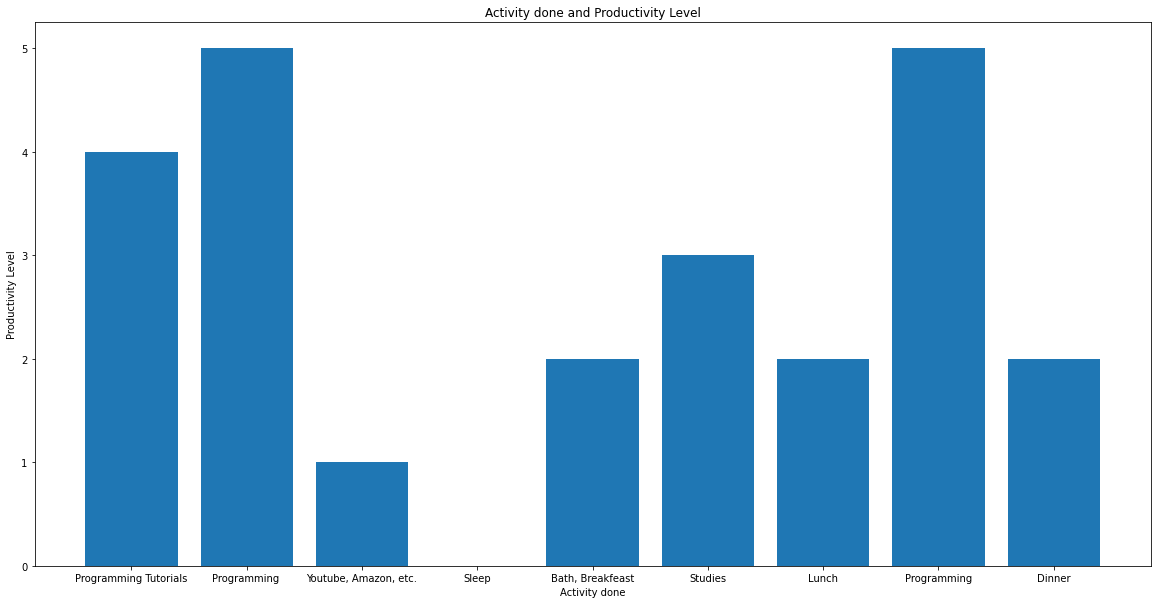

In [8]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (20,10)) 
ax.bar(Daily_Routine['Activity done'], Daily_Routine['Productivity Level'])
ax.set(title="Activity done and Productivity Level",
xlabel="Activity done",
ylabel="Productivity Level")
fig.show()

In [9]:
Daily_Routine_dict = dict(Daily_Routine)

In [10]:
Daily_Routine_dict_dataframe = pd.DataFrame(Daily_Routine_dict)
Daily_Routine_dict_dataframe

,Start time,End time,Productivity Level,Activity done
0,0.0,1.0,4,Programming Tutorials
1,1.0,2.0,5,Programming
2,2.0,3.0,1,"Youtube, Amazon, etc."
3,3.0,4.0,0,Sleep
4,4.0,5.0,0,Sleep
5,5.0,6.0,0,Sleep
6,6.0,7.0,0,Sleep
7,7.0,8.0,0,Sleep
8,8.0,9.0,0,Sleep
9,9.0,10.0,2,"Bath, Breakfeast"


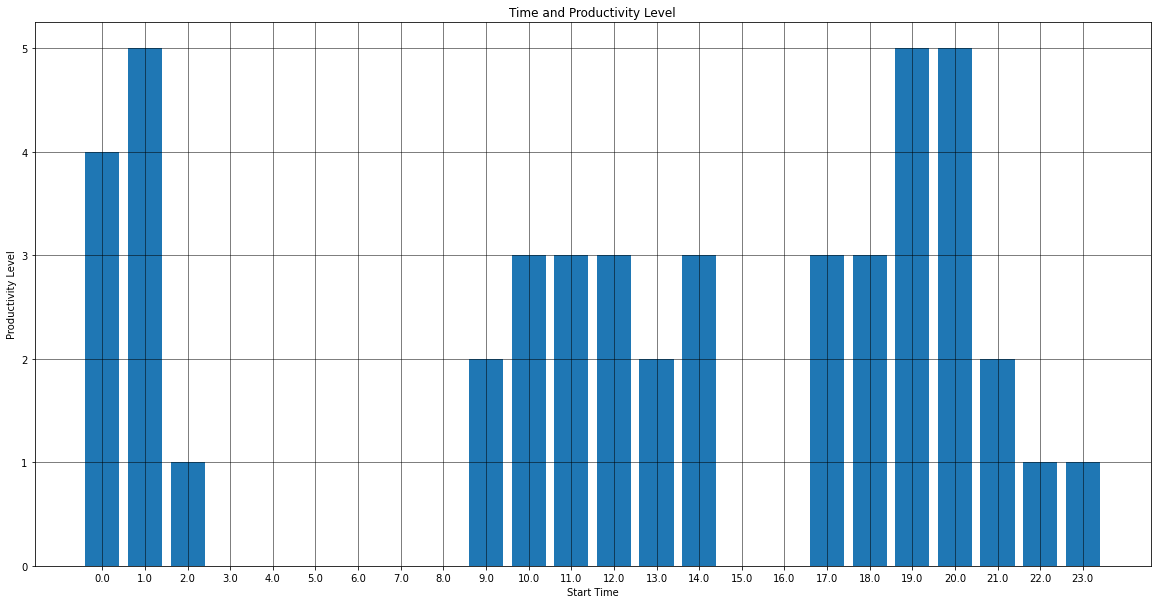

In [11]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (20,10))
plt.grid(color = 'black', linewidth = 0.5)
width = 0.75
ax.bar(Daily_Routine_dict_dataframe['Start time'], Daily_Routine_dict_dataframe['Productivity Level'])
ax.set(title="Time and Productivity Level",
xlabel="Start Time",
ylabel="Productivity Level")
ax.set_xticks(Daily_Routine_dict_dataframe['Start time'])
ax.set_xticklabels(Daily_Routine_dict_dataframe['Start time'].astype(str))
fig.show()